In [1]:
import pandas as pd # pandas library use for data analysis
#first manually convert xls to csv
data = pd.read_csv("Folds_test.csv") # import csv file as dataframe
data # show dataframe 

,AT,V,AP,RH,PE
0,23.64,58.49,1011.40,74.20,445.75
1,29.74,56.90,1007.15,41.91,438.76
2,19.07,49.69,1007.22,76.79,453.09
3,11.80,40.66,1017.13,97.20,464.43
4,13.97,39.16,1016.05,84.60,470.96
...,...,...,...,...,...
9562,15.12,48.92,1011.80,72.93,462.59
9563,33.41,77.95,1010.30,59.72,432.90
9564,15.99,43.34,1014.20,78.66,465.96
9565,17.65,59.87,1018.58,94.65,450.93


In [2]:
data=  data.head(3000)

In [3]:
data

,AT,V,AP,RH,PE
0,23.64,58.49,1011.40,74.20,445.75
1,29.74,56.90,1007.15,41.91,438.76
2,19.07,49.69,1007.22,76.79,453.09
3,11.80,40.66,1017.13,97.20,464.43
4,13.97,39.16,1016.05,84.60,470.96
...,...,...,...,...,...
2995,20.04,48.92,1011.14,68.92,447.89
2996,9.37,42.32,1015.15,82.96,477.57
2997,20.76,58.18,1007.80,99.22,449.25
2998,31.17,69.51,1010.51,43.11,428.94


In [4]:
import numpy as np # numpy is library use for matrix manipulation

# split a univariate sequence into samples
def split_sequence(sequence, n_steps): 
    X, y = list(), list() # initilize list for feature matrixs and labels
    for i in range(len(sequence)): # loop through number of sequence 
        end_ix = i + n_steps # initilize end value  
        if end_ix > len(sequence)-1: # check if end value is greater than length of sequence 
            break # use break to termninate the loop
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] # seperate features and labels
        X.append(seq_x) # save feature in X list
        y.append(seq_y) # save label in Y lisr
    return np.array(X), np.array(y) # return X and Y

In [5]:
x1= np.array(data['AT'].values)  # save values of AT column in x1
x2= np.array(data['V'].values)  # save values of V column in x2
x3= np.array(data['AP'].values)  # save values of AP column in x3
x4= np.array(data['RH'].values)  # save values of RH column in x4
x5= np.array(data['PE'].values) # save values of PE column in x5

In [6]:
seq_len=4
x_1, y_1 = split_sequence(x1, seq_len) # call split sequence function 
x_2, y_2 = split_sequence(x2, seq_len) # call split sequence function 
x_3, y_3 = split_sequence(x3, seq_len) # call split sequence function 
x_4, y_4 = split_sequence(x4, seq_len) # call split sequence function 
x_5, y_5 = split_sequence(x5, seq_len) # call split sequence function 

In [7]:
from numpy import hstack # use hstack to merger different columns
X = hstack((x_1, x_2,x_3,x_4,x_5)) # merger 5 featuers into one matrix X 

In [8]:
y_1 = y_1.reshape((-1, 1)) # convert vector row to vector column matrix
y_2 = y_2.reshape((-1, 1)) # convert vector row to vector column matrix
y_3 = y_3.reshape((-1, 1)) # convert vector row to vector column matrix
y_4 = y_4.reshape((-1, 1)) # convert vector row to vector column matrix
y_5 = y_5.reshape((-1, 1)) # convert vector row to vector column matrix

In [9]:
Y = np.column_stack((y_1,y_2,y_3,y_4,y_5)) # use column wise merge to 5 labels matrix into Y

In [10]:
print(X.shape) # 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

(2996, 20)


In [11]:
from tensorflow.keras.models import Sequential # import keras sequential library
from tensorflow.keras.layers import Dense, LSTM # import keras dense and lstm layers
from sklearn.model_selection import train_test_split # import train and test library
from sklearn.metrics import mean_squared_error # import metrics
import matplotlib.pyplot as plt # for visualization purpose

x = X.reshape(X.shape[0], X.shape[1], 1) # As lstm need three dimensions, so add one extra dimension
print("x:", x.shape, "y:", Y.shape) # print shape
 
in_dim = (x.shape[1], x.shape[2]) # save in input dimension
out_dim = Y.shape[1] # save in out_dim variable
print(in_dim) # print 
print(out_dim) # print 

xtrain, xtest, ytrain, ytest=train_test_split(x, Y, test_size=0.2) # call train_test_split function
print("xtrain:", xtrain.shape, "ytrian:", ytrain.shape) # print 




model = Sequential() # call sequential constructot
model.add(LSTM(32, input_shape=in_dim,return_sequences=True)) # configure lstm layers with 32 hidden neurons
model.add(LSTM(64)) # 2nd layer is 64 hidden neurons
model.add(Dense(out_dim,activation='linear')) # fully connected layer with 5 variable
model.compile(optimizer = 'adam', loss = 'mean_squared_error') # use optimizer adam and loss is mse
model.summary() # overall summary 

history=model.fit(xtrain, ytrain, validation_split=0.1,epochs=150, batch_size=32, verbose=2,shuffle=True) # train the network

x: (2996, 20, 1) y: (2996, 5)
(20, 1)
5
xtrain: (2396, 20, 1) ytrian: (2396, 5)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 29,509
Trainable params: 29,509
Non-trainable params: 0
_________________________________________________________________
Train on 2156 samples, validate on 240 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/150
2156/2156 - 6s - loss: 0.0809 -

Epoch 108/150
2156/2156 - 3s - loss: 0.0445 - val_loss: 0.0436
Epoch 109/150
2156/2156 - 3s - loss: 0.0444 - val_loss: 0.0436
Epoch 110/150
2156/2156 - 2s - loss: 0.0445 - val_loss: 0.0436
Epoch 111/150
2156/2156 - 2s - loss: 0.0446 - val_loss: 0.0435
Epoch 112/150
2156/2156 - 2s - loss: 0.0446 - val_loss: 0.0435
Epoch 113/150
2156/2156 - 3s - loss: 0.0445 - val_loss: 0.0436
Epoch 114/150
2156/2156 - 3s - loss: 0.0445 - val_loss: 0.0436
Epoch 115/150
2156/2156 - 3s - loss: 0.0445 - val_loss: 0.0440
Epoch 116/150
2156/2156 - 3s - loss: 0.0447 - val_loss: 0.0437
Epoch 117/150
2156/2156 - 3s - loss: 0.0446 - val_loss: 0.0436
Epoch 118/150
2156/2156 - 3s - loss: 0.0445 - val_loss: 0.0436
Epoch 119/150
2156/2156 - 3s - loss: 0.0444 - val_loss: 0.0436
Epoch 120/150
2156/2156 - 3s - loss: 0.0445 - val_loss: 0.0435
Epoch 121/150
2156/2156 - 2s - loss: 0.0445 - val_loss: 0.0436
Epoch 122/150
2156/2156 - 3s - loss: 0.0444 - val_loss: 0.0436
Epoch 123/150
2156/2156 - 3s - loss: 0.0446 - val_loss:

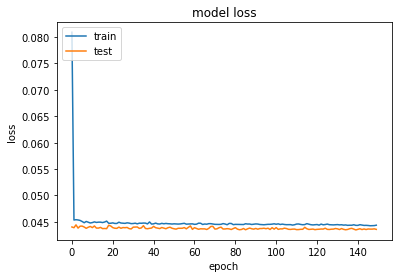

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
testpred = model.predict(xtest) # validate model on test data 
testpred = scaler.inverse_transform(testpred) # denormalized the data
testpred # show the test prediction result

array([[  20.458174,   55.60243 , 1013.111   ,   72.608154,  452.90356 ],
       [  20.470823,   56.197086, 1013.1004  ,   72.58765 ,  452.3253  ],
       [  19.881907,   54.68037 , 1012.9793  ,   73.62792 ,  454.17462 ],
       ...,
       [  18.907513,   52.524307, 1013.40485 ,   74.212814,  456.74854 ],
       [  19.847376,   54.55671 , 1013.2332  ,   74.64525 ,  454.6828  ],
       [  19.31717 ,   53.29331 , 1013.40704 ,   75.07038 ,  456.08585 ]],
      dtype=float32)

In [14]:
xtest[0] # for one row 

array([[0.60425654],
       [0.65142364],
       [0.6957147 ],
       [0.46821973],
       [0.84658884],
       [0.47555637],
       [0.80901131],
       [0.73184969],
       [0.32055749],
       [0.34444998],
       [0.41737183],
       [0.63066202],
       [0.87451401],
       [0.7248961 ],
       [0.67971578],
       [0.64123877],
       [0.1342454 ],
       [0.23186547],
       [0.29913068],
       [0.38135956]])

In [15]:
test_one_row = np.expand_dims(xtest[0], axis=0) #  add dummy dimension

In [16]:
testpred_row = model.predict(test_one_row) # test with one row 
testpred_row = scaler.inverse_transform(testpred_row) # denormalized the prediction
testpred_row # show the result

array([[  20.458174,   55.60243 , 1013.111   ,   72.60814 ,  452.90356 ]],
      dtype=float32)